# Project Milestone 3

In [8]:
import os
import math
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Import

In [9]:
# Glove
glove_df_train = pd.read_csv("../../project_data/data/glove/glove.train.csv")
glove_df_test = pd.read_csv("../../project_data/data/glove/glove.test.csv")
glove_df_eval = pd.read_csv("../../project_data/data/glove/glove.eval.anon.csv")

# Add bias
glove_df_train["bias"] = 1
glove_df_test["bias"] = 1
glove_df_eval["bias"] = 1

# Replace label 0 with -1
glove_df_train.loc[glove_df_train["label"] == 0, "label"] = -1
glove_df_test.loc[glove_df_test["label"] == 0, "label"] = -1
glove_df_eval.loc[glove_df_eval["label"] == 0, "label"] = -1

glove_df_train

# Bag of words
bow_df_train = pd.read_csv("../../project_data/data/bag-of-words/bow.train.csv")
bow_df_test = pd.read_csv("../../project_data/data/bag-of-words/bow.test.csv")
bow_df_eval = pd.read_csv("../../project_data/data/bag-of-words/bow.eval.anon.csv")

# Add bias
bow_df_train["bias"] = 1
bow_df_test["bias"] = 1
bow_df_eval["bias"] = 1

# Replace label 0 with -1
bow_df_train.loc[bow_df_train["label"] == 0, "label"] = -1
bow_df_test.loc[bow_df_test["label"] == 0, "label"] = -1
bow_df_eval.loc[bow_df_eval["label"] == 0, "label"] = -1


# Bag of words
tfidf_df_train = pd.read_csv("../../project_data/data/tfidf/tfidf.train.csv")
tfidf_df_test = pd.read_csv("../../project_data/data/tfidf/tfidf.test.csv")
tfidf_df_eval = pd.read_csv("../../project_data/data/tfidf/tfidf.eval.anon.csv")

# Add bias
tfidf_df_train["bias"] = 1
tfidf_df_test["bias"] = 1
tfidf_df_eval["bias"] = 1

# Replace label 0 with -1
tfidf_df_train.loc[tfidf_df_train["label"] == 0, "label"] = -1
tfidf_df_test.loc[tfidf_df_test["label"] == 0, "label"] = -1
tfidf_df_eval.loc[tfidf_df_eval["label"] == 0, "label"] = -1

print("Glove Dataset")
glove_df_train

print("BOW Dataset")
bow_df_train

print("TFIDF Dataset")
tfidf_df_train

Glove Dataset
BOW Dataset
TFIDF Dataset


,label,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999,bias
0,1,0.177057,0.063437,0.083603,0.407604,0.119183,0.096883,0.047931,0.117364,0.046370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020774,0.000000,0.020098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-1,0.000000,0.109398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0.000000,0.000000,0.044455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17496,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17497,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17498,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Common Functions

In [33]:
def prepare_train_test_folds(dfs):
    test_folds = []
    train_folds = []

    for i in range(len(dfs)):
        df_test = None
        df_train = []
        for df_index, df_element in enumerate(dfs):
            if i == df_index:
                df_test = df_element
                test_folds.append(df_test)
            else:
                df_train.append(df_element)

        df_train = pd.concat(df_train, ignore_index=True)  # List of folds are contacted and index is continuous.
        train_folds.append(df_train)

    return train_folds, test_folds


def predict(example, weights):
    value = np.dot(weights, example)  # wT x
    return 1 if value > 0 else -1


def test_accuracy(df, weights, store_eval=False):
    eval_list = []
    total = df.shape[0]
    true_examples = 0
    correct_prediction = 0
    true_positive = 0  # classifier predicts as positive and are truly positive.
    false_positive = 0  # classifier predicts as positive, but are actually labeled negative
    false_negative = 0  # predicted as negative by your classifier, but are actually positive

    for _, row in df.iterrows():
        actual_label = int(row.tolist()[0])
        if actual_label > 0:
            true_examples += 1

        example = np.array(row.tolist()[1:])
        predicted_label = predict(example, weights)
        # print(f"actual_label: {actual_label}, predicted_label: {predicted_label}")
        if predicted_label == actual_label:
            correct_prediction += 1

        if predicted_label == 1 and actual_label == 1:
            true_positive += 1

        if predicted_label == 1 and actual_label == -1:
            false_positive += 1

        if predicted_label == -1 and actual_label == 1:
            false_negative += 1

        if store_eval:
            eval_list.append(predicted_label)

    # Based on piazza post @332
    try:
        precision = true_positive / (true_positive + false_positive)
    except ZeroDivisionError:
        precision = 1

    try:
        recall = true_positive / (true_positive + false_negative)
    except ZeroDivisionError:
        recall = correct_prediction / true_examples

    try:
        f1_value = (2 * precision * recall) / (precision + recall)
    except ZeroDivisionError:
        f1_value = 0

    avg_accuracy = correct_prediction / total

    return avg_accuracy, precision, recall, f1_value, eval_list


def get_key_of_max_value(map):
    max_key = ""
    max_val = float("-inf")

    for key, val in map.items():
        if val >= max_val:
            max_val = val
            max_key = key

    return max_key


def plot_loss(loss, epochs, label):
    if not loss or type(loss) is not list:
        print(f"Can't plot loss curve. Invalid loss: {loss}")
        return

    fig = plt.figure()

    # Plot the data
    plt.plot(epochs, loss, label="Loss Epoch Curve")

    # plt.xticks(epochs)
    # plt.yticks([50, 60, 70, 80, 90])

    # Label the x-axis & y-axis
    plt.xlabel("Epochs")
    plt.ylabel("Loss Values")

    plt.legend()

    # Add title to graph
    plt.title(f"{label}")

    # Save the figure
    fig.savefig("figs/{0}.png".format(label))


def initialize_weights(rand_start, rand_end, feature_count):
    random_number = random.uniform(rand_start, rand_end)

    weights = []  # All weights and bias should be same.
    for _ in range(feature_count):
        weights.append(random_number)

    return weights

## Support Vector Machine

In [31]:
def svm(df, lr, tradeoff, error, epochs):
    objectives = []
    hinge_losses = []

    weights = np.zeros(df.shape[1] - 1)  # features + bias

    for epoch in range(1, epochs + 1):
        # Reset hinge loss for every epoch
        total_objective = 0
        total_hinge_loss = 0

        # Change learning rate for every epoch
        lr_t = lr / (1 + epoch)

        # Shuffle dataset and for each example update weights.
        df = df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
        for _, row in df.iterrows():
            label = row.tolist()[0]
            example = np.array(row.tolist()[1:])

            if label * (np.dot(weights, example)) <= 1:
                weights = ((1 - lr_t) * weights) + (lr_t * tradeoff * label * example)
            else:
                weights = (1 - lr_t) * weights

        for _, row in df.iterrows():
            label = row.tolist()[0]
            example = np.array(row.tolist()[1:])

            hinge_loss = max(0, 1 - (label * np.dot(weights, example)))
            new_objective = 0.5 * np.dot(weights, weights) + tradeoff * hinge_loss

            total_objective += new_objective
            total_hinge_loss += hinge_loss

        objectives.append(total_objective)
        hinge_losses.append(total_hinge_loss)

        # Only new objective is present.
        if len(objectives) == 1:
            print(f"    Epoch: {epoch}, First Objective: {objectives[0]:<15}, Loss: {total_hinge_loss}")
            continue

        # Mentioned in class to use relative difference.
        cur_objective = objectives[-1]
        prev_objective = objectives[-2]
        difference = np.abs((cur_objective - prev_objective) / prev_objective)
        print(f"    Epoch: {epoch}, Objective difference: {difference:<15}, Loss: {total_hinge_loss}")

        if difference < error:
            break

    return weights, objectives, hinge_losses


def online_setup(train_df, test_df, learning_rate, tradeoff, epochs, error, label):
    weights, objectives, hinge_losses = svm(
        df=train_df, lr=learning_rate, tradeoff=tradeoff, error=error, epochs=epochs
    )
    plot_loss(loss=hinge_losses, epochs=np.arange(len(hinge_losses)), label=label)
    avg_accuracy, precision, recall, f1_value, _ = test_accuracy(
        df=test_df, weights=weights, store_eval=False
    )

    print("")
    print(f"    Avg_accuracy: {avg_accuracy}")
    print(f"    Precision: {precision}")
    print(f"    Recall: {recall}")
    print(f"    F1-Value: {f1_value}")

    return weights

## Training Setup & Results

To invoke one of more datasets on one or more perceptron.


Glove Dataset Setup Details
  Epoch Error: 0.001
  Random Seed: 42
  Learning Rates: [0.01, 0.001]
  Tradeoff Parameters: [1000.0, 100.0, 0.1, 0.01, 0.001]

  SVM: Glove Dataset Learning rates: 0.01, Tradeoff: 1000.0
  glove_lr_0.01_tradeoff_1000.0

    Epoch: 1, First Objective: 534722061044.21924, Loss: 505872686.40936863
    Epoch: 2, Objective difference: 0.8835547488101742, Loss: 48175779.60052154
    Epoch: 3, Objective difference: 3.626302943881024, Loss: 281218085.3550646
    Epoch: 4, Objective difference: 0.6768078387029736, Loss: 87330455.20031072
    Epoch: 5, Objective difference: 0.7127673630472963, Loss: 21777020.295654695
    Epoch: 6, Objective difference: 0.14358895901754334, Loss: 26677724.711756147
    Epoch: 7, Objective difference: 0.21054660584791646, Loss: 20902043.667599212
    Epoch: 8, Objective difference: 0.0007852293605173633, Loss: 20700101.142361894

    Avg_accuracy: 0.5417777777777778
    Precision: 0.5179900744416873
    Recall: 0.7667584940312213
  

/var/folders/1m/0v94z2r1269fztvg5qrsfn500000gn/T/ipykernel_94173/3133035419.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()



    Avg_accuracy: 0.6364444444444445
    Precision: 0.6766623207301173
    Recall: 0.4765840220385675
    F1-Value: 0.5592672413793103

  SVM: BOW Dataset Learning rates: 0.01, Tradeoff: 0.1
  bow_lr_0.01_tradeoff_0.1

    Epoch: 1, First Objective: 1869.7122551672885, Loss: 17219.06175408061
    Epoch: 2, Objective difference: 0.023402387523982212, Loss: 17429.66230534574
    Epoch: 3, Objective difference: 0.015452514305239926, Loss: 17337.92758305351
    Epoch: 4, Objective difference: 0.01921299749942381, Loss: 17211.760292279527
    Epoch: 5, Objective difference: 0.000980768319628578, Loss: 17212.591402208796
    Epoch: 6, Objective difference: 0.0002017233342713082, Loss: 17239.965312957716
    Epoch: 7, Objective difference: 0.00188257552391537, Loss: 17203.386141871568
    Epoch: 8, Objective difference: 0.005750758057195135, Loss: 17206.227967373183
    Epoch: 9, Objective difference: 0.008419843524663233, Loss: 17222.047684231406
    Epoch: 10, Objective difference: 0.01104

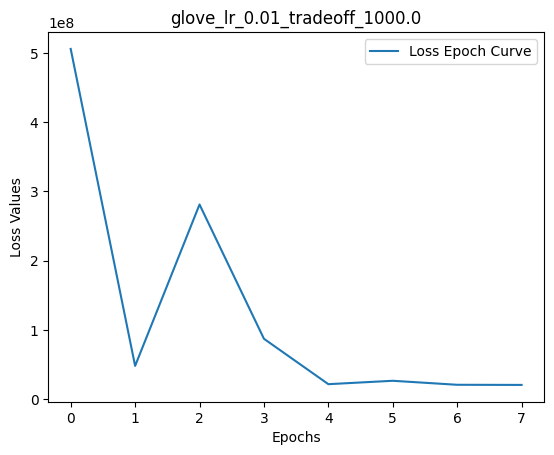

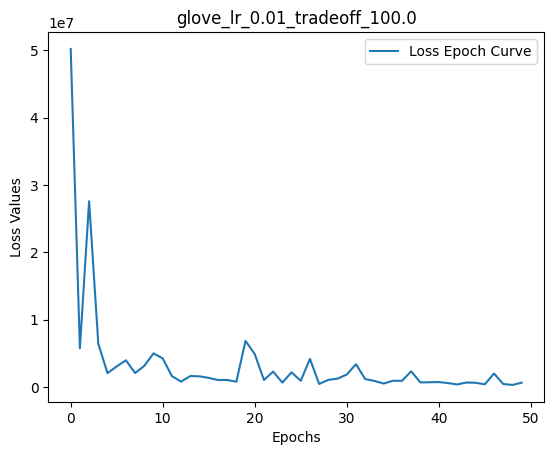

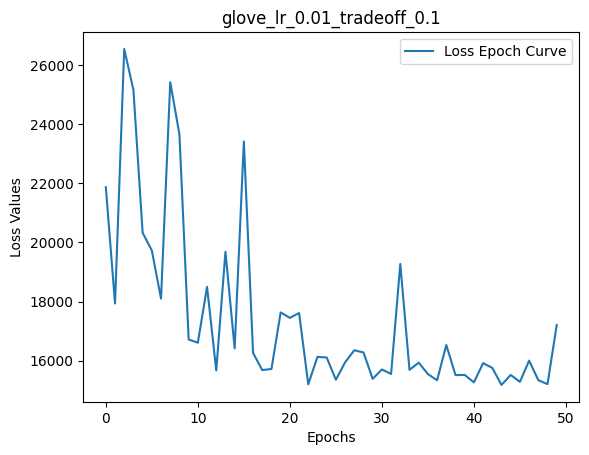

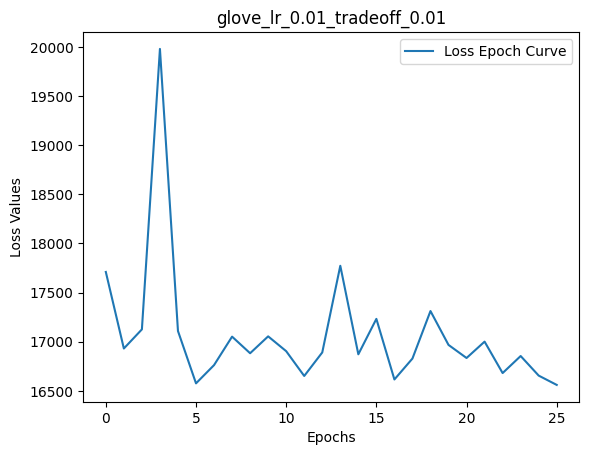

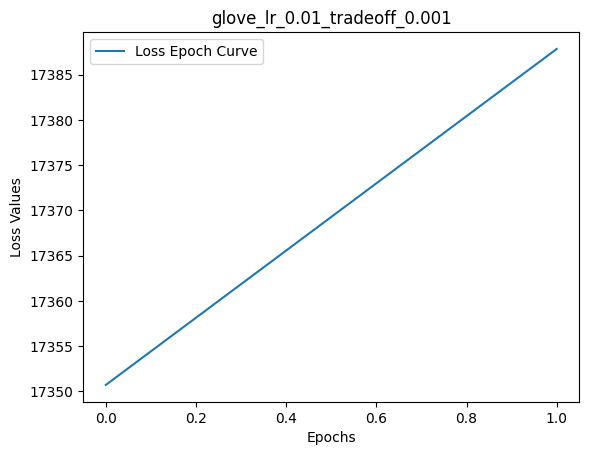

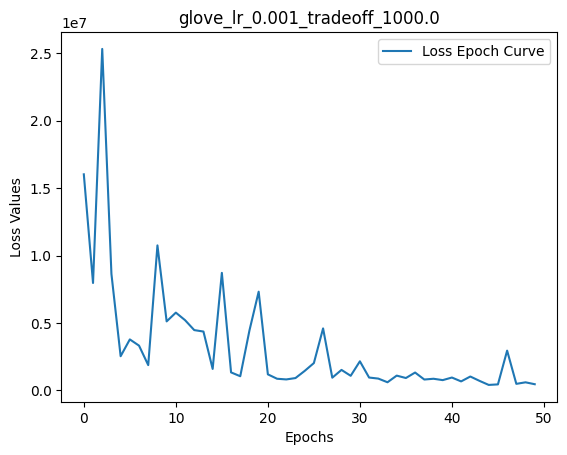

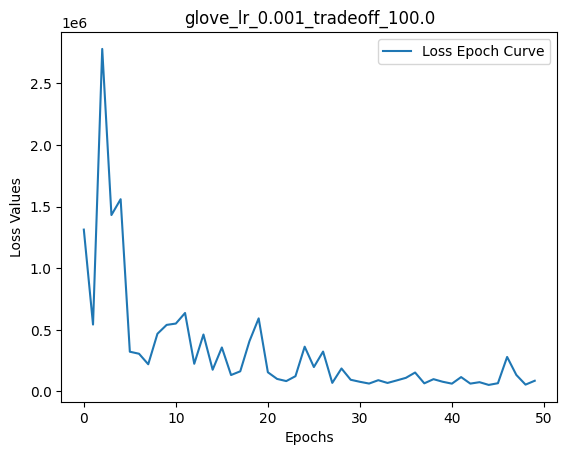

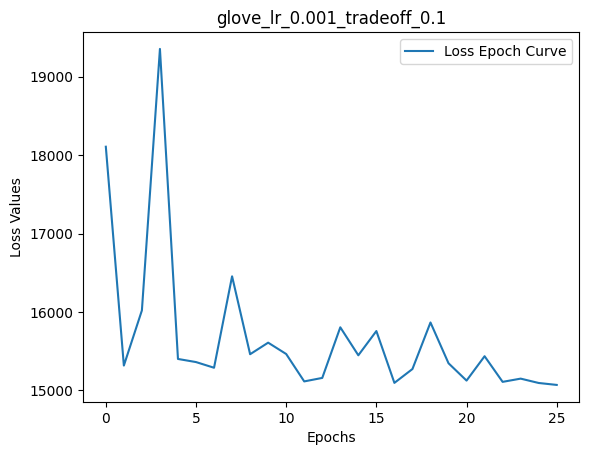

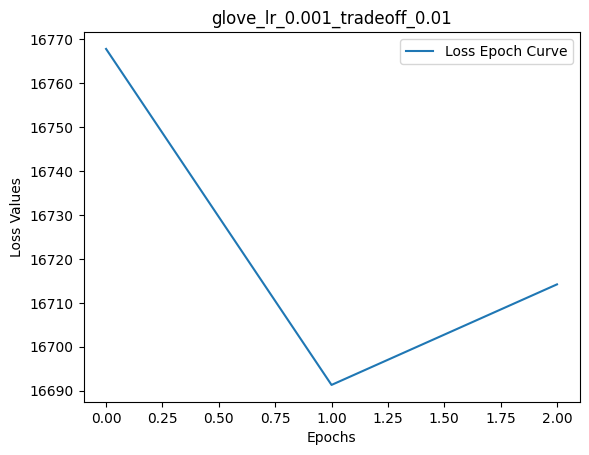

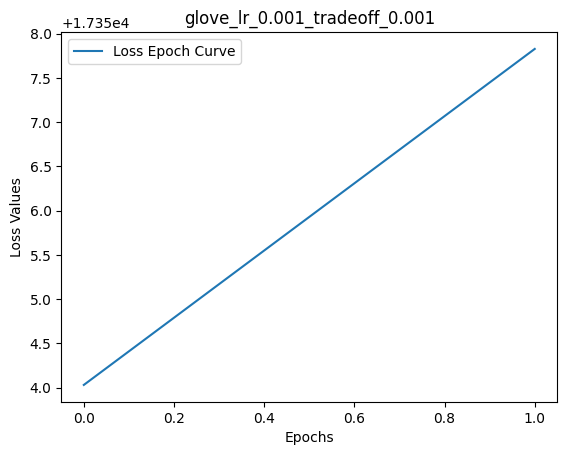

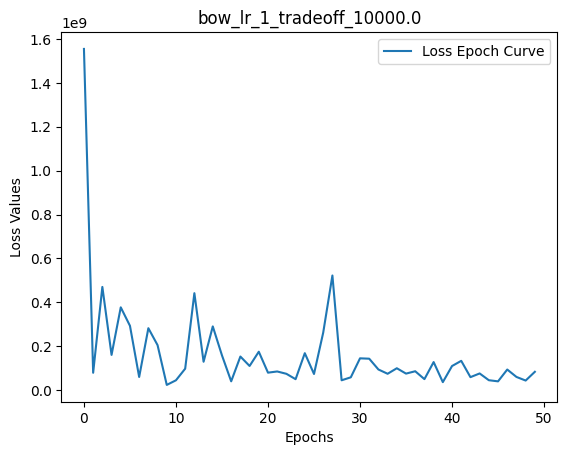

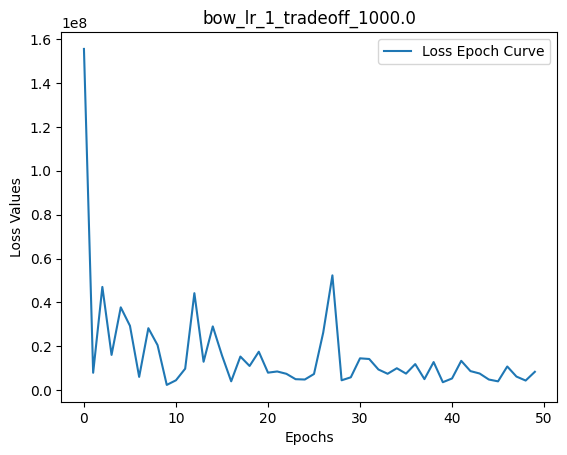

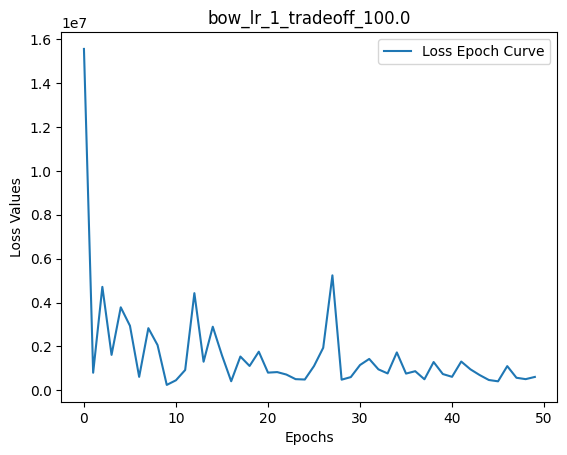

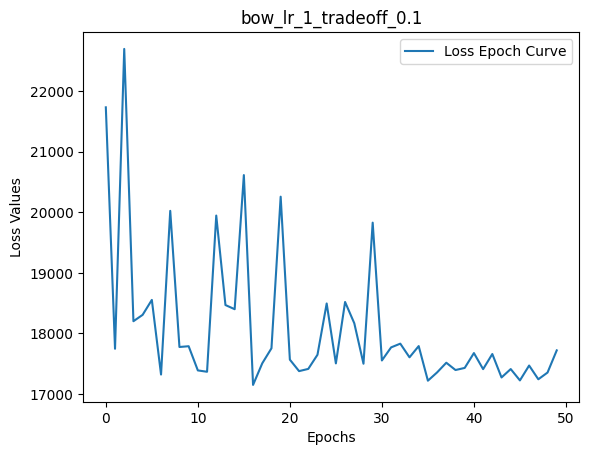

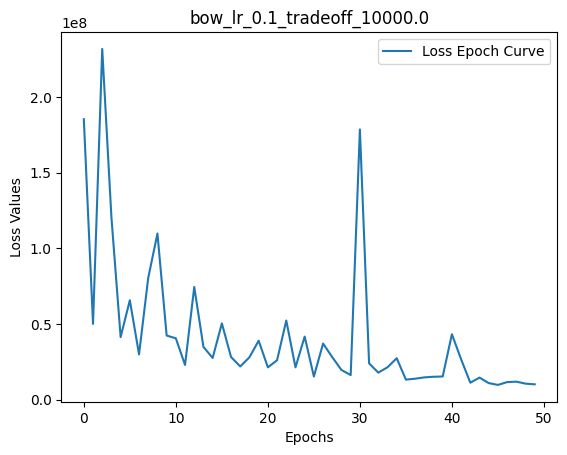

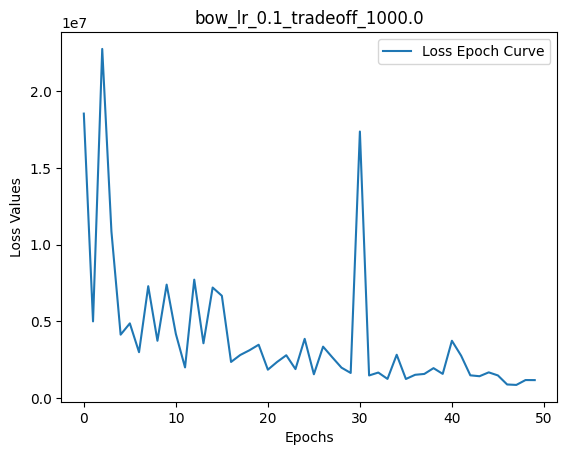

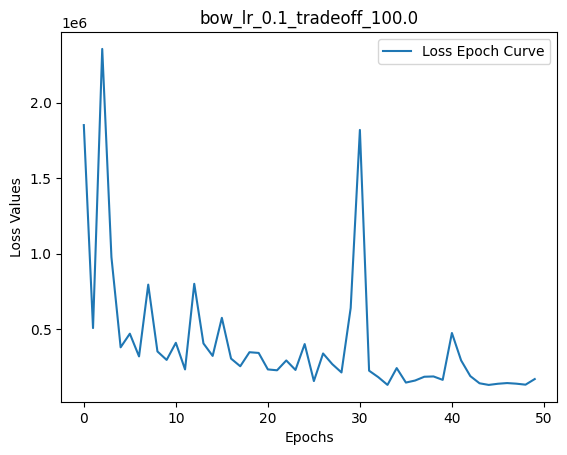

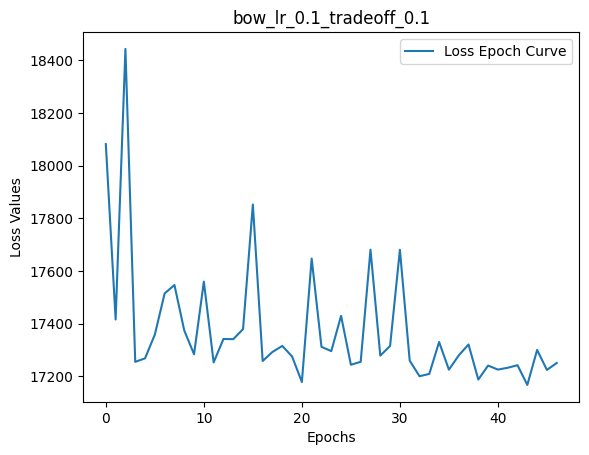

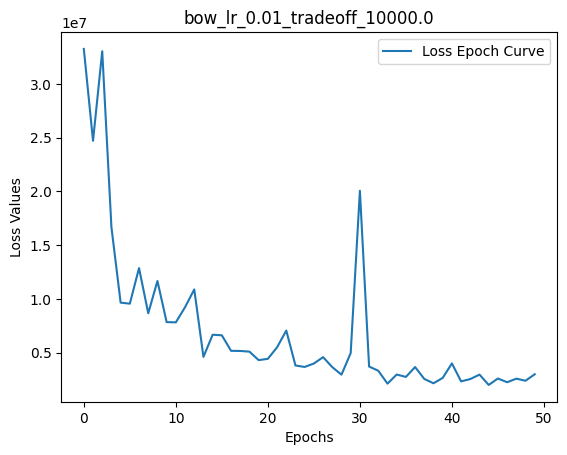

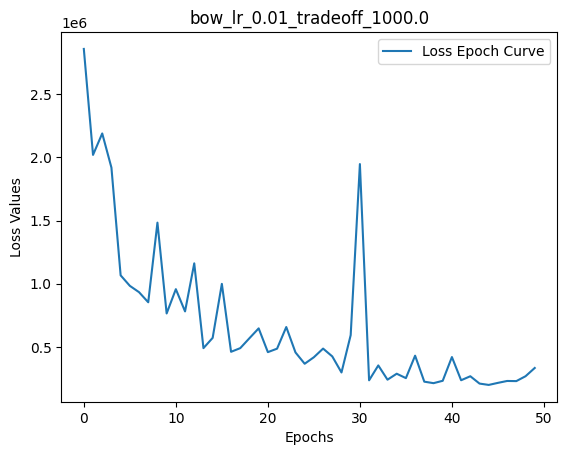

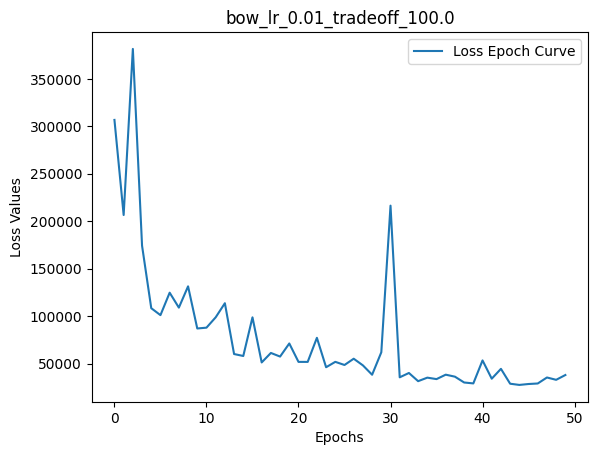

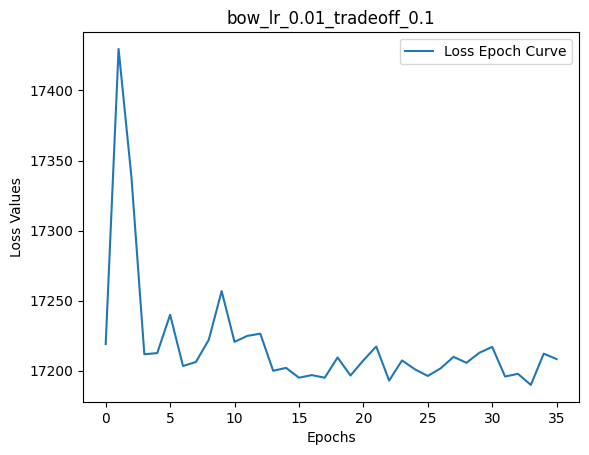

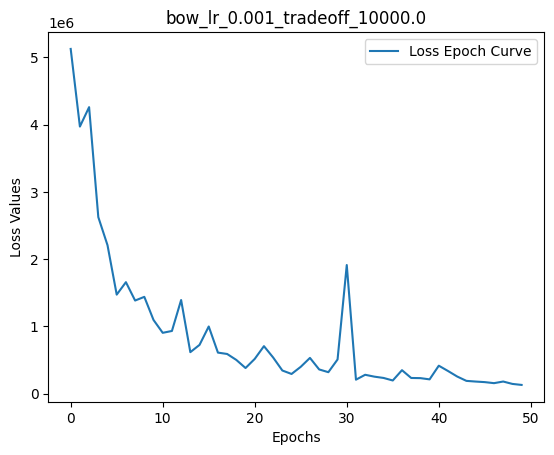

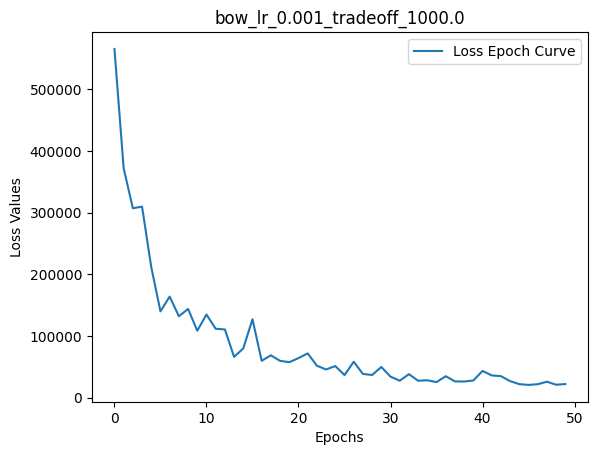

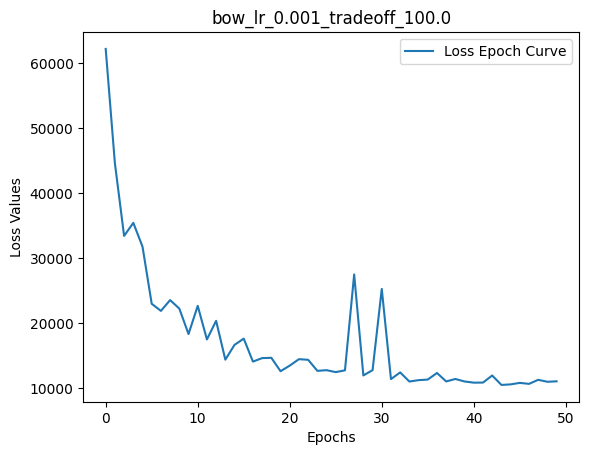

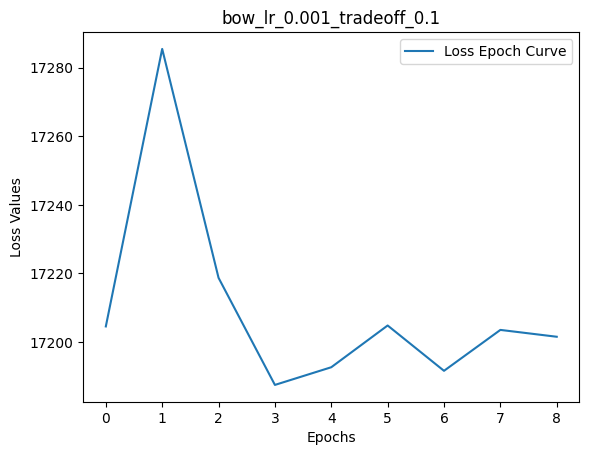

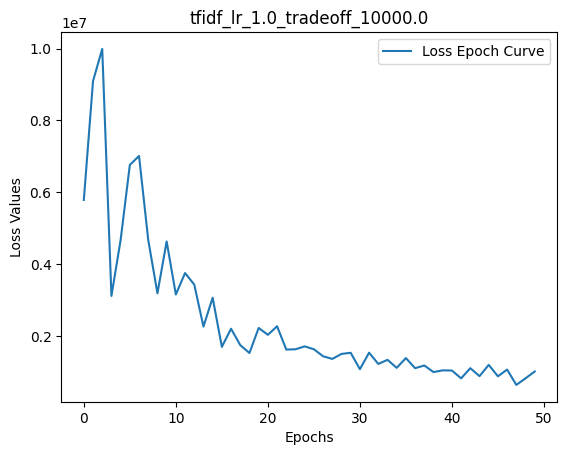

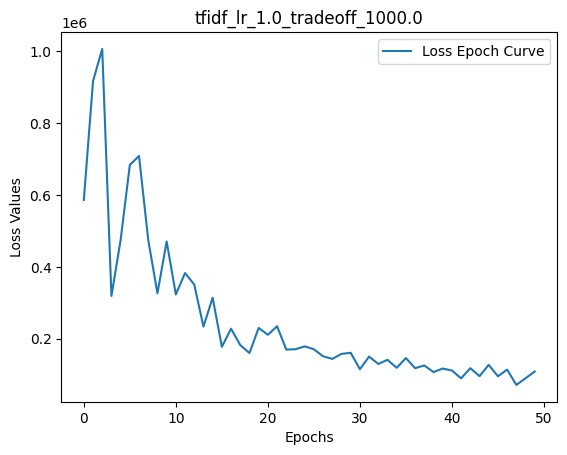

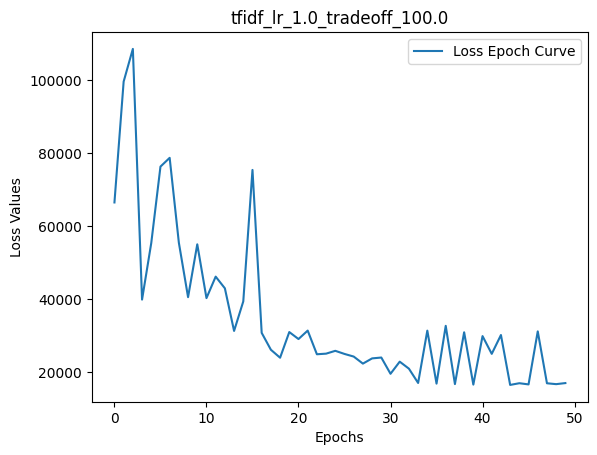

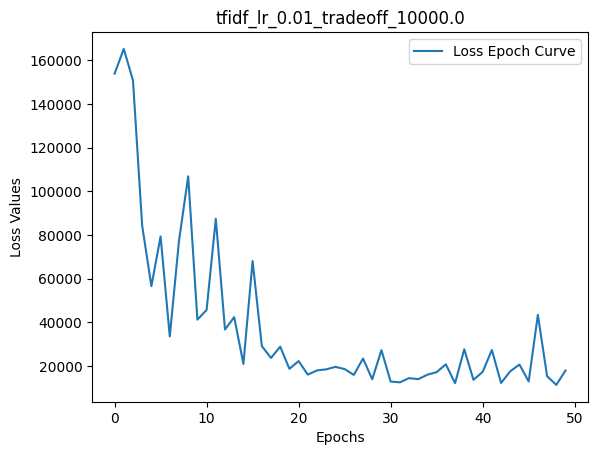

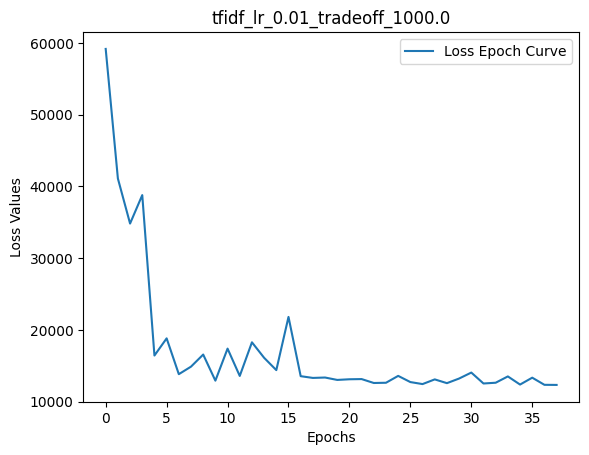

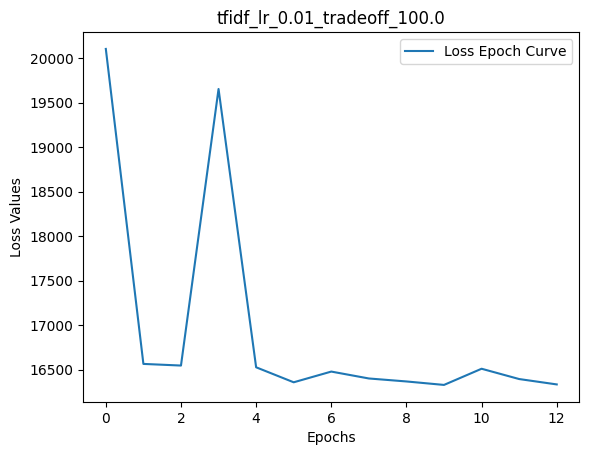

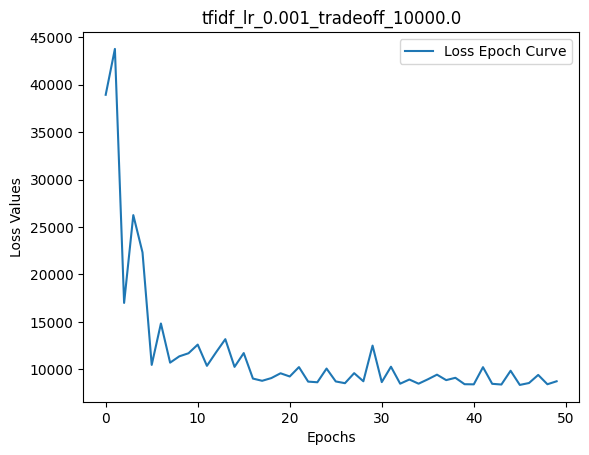

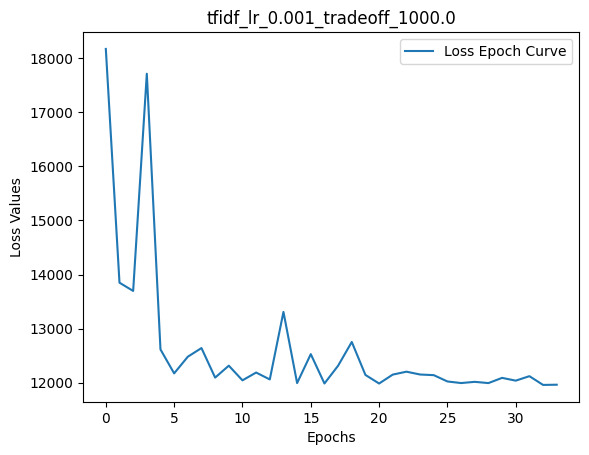

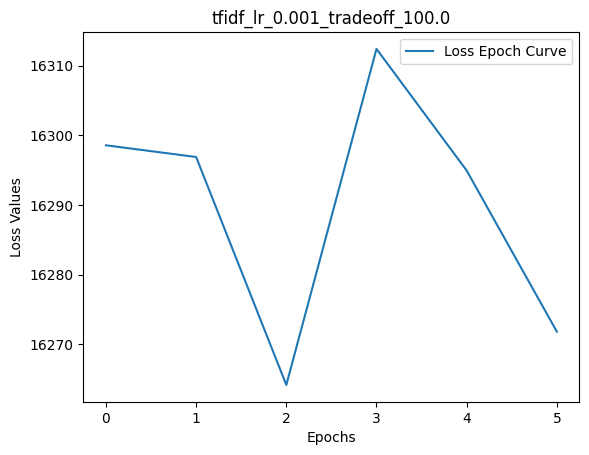

In [36]:
model_type = "svm"

# error = 0.1
# error = 0.001
# error = 0.0001

random_seed = 42
np.random.seed(random_seed)

initial_learning_rates = [1.0]\
loss_tradeoff_parameter = [100.0]
# initial_learning_rates = [1.0, 0.1, 0.01, 0.001, 0.0001]
loss_tradeoff_parameter = [
    10000.0,
    1000.0,
    100.0,
    10.0,
    0.1,
    0.01,
    0.001,
    0.0001,
]  # Mentioned in class to add higher tradeoff parameters.

dataset_setup_dict = {
    "Glove": {"Train": glove_df_train, "Test": glove_df_test, "Eval": glove_df_eval},
    "BOW": {"Train": bow_df_train, "Test": bow_df_test, "Eval": bow_df_eval},
    "TFIDF": {"Train": tfidf_df_train, "Test": tfidf_df_test, "Eval": tfidf_df_eval},
}

train_setup_dict = {
    "DatasetSetup": {
        "Glove": {
            "Epochs": 50,
            "Error": 0.001,
            # "LearningRates": [0.01, 0.001],
            # "Tradeoffs": [1000.0,],
            "LearningRates": [0.01, 0.001],
            "Tradeoffs": [1000.0, 100.0, 0.1, 0.01, 0.001],
            # "Tradeoffs": [1000.0],
            # "LearningRates": [1.0, 0.1, 0.01, 0.001],
        },
        "BOW": {
            "Epochs": 50,
            "Error": 0.0001,
            "LearningRates": [1, 0.1, 0.01, 0.001],
            "Tradeoffs": [10000.0, 1000.0, 100.0, 0.1],
        },
        "TFIDF": {
            "Epochs": 50,
            "Error": 0.001,
            "LearningRates": [1.0, 0.01, 0.001],
            "Tradeoffs": [10000.0, 1000.0, 100.0],
        },
    },
    # "Datasets": ["Glove"],
    # "Datasets": ["BOW"],
    # "Datasets": ["TFIDF"],
    "Datasets": ["Glove", "BOW", "TFIDF"],
}


def export_prediction_to_csv(file_name, prediction_list):
    # Change back -1 to 0
    for index, p in enumerate(prediction_list):
        if p == -1:
            prediction_list[index] = 0

    df = pd.DataFrame(prediction_list)
    df.to_csv(f"results/{file_name}.csv", index=True, index_label="example_id", header=["label"])


def export_weights(file_name, weights):
    weights = np.array2string(weights)
    with open(f"weights/{file_name}.txt", "w") as file:
        file.write(weights)


def train_setup():
    for dataset in train_setup_dict["Datasets"]:
        error = train_setup_dict["DatasetSetup"][dataset]["Error"]
        epochs = train_setup_dict["DatasetSetup"][dataset]["Epochs"]
        lrs = train_setup_dict["DatasetSetup"][dataset]["LearningRates"]
        tradeoffs = train_setup_dict["DatasetSetup"][dataset]["Tradeoffs"]

        print(f"\n{dataset} Dataset Setup Details")
        print(f"  Epoch Error: {error}")
        print(f"  Random Seed: {random_seed}")
        print(f"  Learning Rates: {lrs}")
        print(f"  Tradeoff Parameters: {tradeoffs}")

        for lr in lrs:
            for tradeoff in tradeoffs:
                label = f"{dataset.lower()}_lr_{lr}_tradeoff_{tradeoff}"
                print(f"\n  SVM: {dataset} Dataset Learning rates: {lr}, Tradeoff: {tradeoff}")
                print(f"  {label}\n")

                weights = online_setup(
                    train_df=dataset_setup_dict[dataset]["Train"],
                    test_df=dataset_setup_dict[dataset]["Test"],
                    learning_rate=lr,
                    tradeoff=tradeoff,
                    epochs=epochs,
                    error=error,
                    label=label,
                )
                export_weights(label, weights)

                _, _, _, _, prediction_list = test_accuracy(
                    df=dataset_setup_dict[dataset]["Eval"], weights=weights, store_eval=True
                )
                export_prediction_to_csv(label, prediction_list)


train_setup()